In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Preplacementdata.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()


sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
 dataset.cov(numeric_only=True)
#numeric_only=True:-it is for only numeric values is there calculation is done ,if any float like any categorical datas come inbetween we can"t do, so we use this.
#HOW IT WORKS:
#example:1]Difference b/t deg_p vs etest_p=22%
#         2]Difference b/t etest_p vs mba_p=17%   this like we can get info using covariance

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,2.449065e+04
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,9.017549e+05
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,7.633598e+05
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,4.651315e+05
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,3.842344e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,1.262455e+05
salary,24490.654206,901754.893936,763359.777657,465131.504238,384234.419257,126245.485547,2.395714e+10


In [6]:
 dataset.corr(numeric_only=True)
##HOW IT WORKS:
#example:1]Relation b/t salary vs mba =14% 

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002543
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.002543,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [7]:
import seaborn as sns

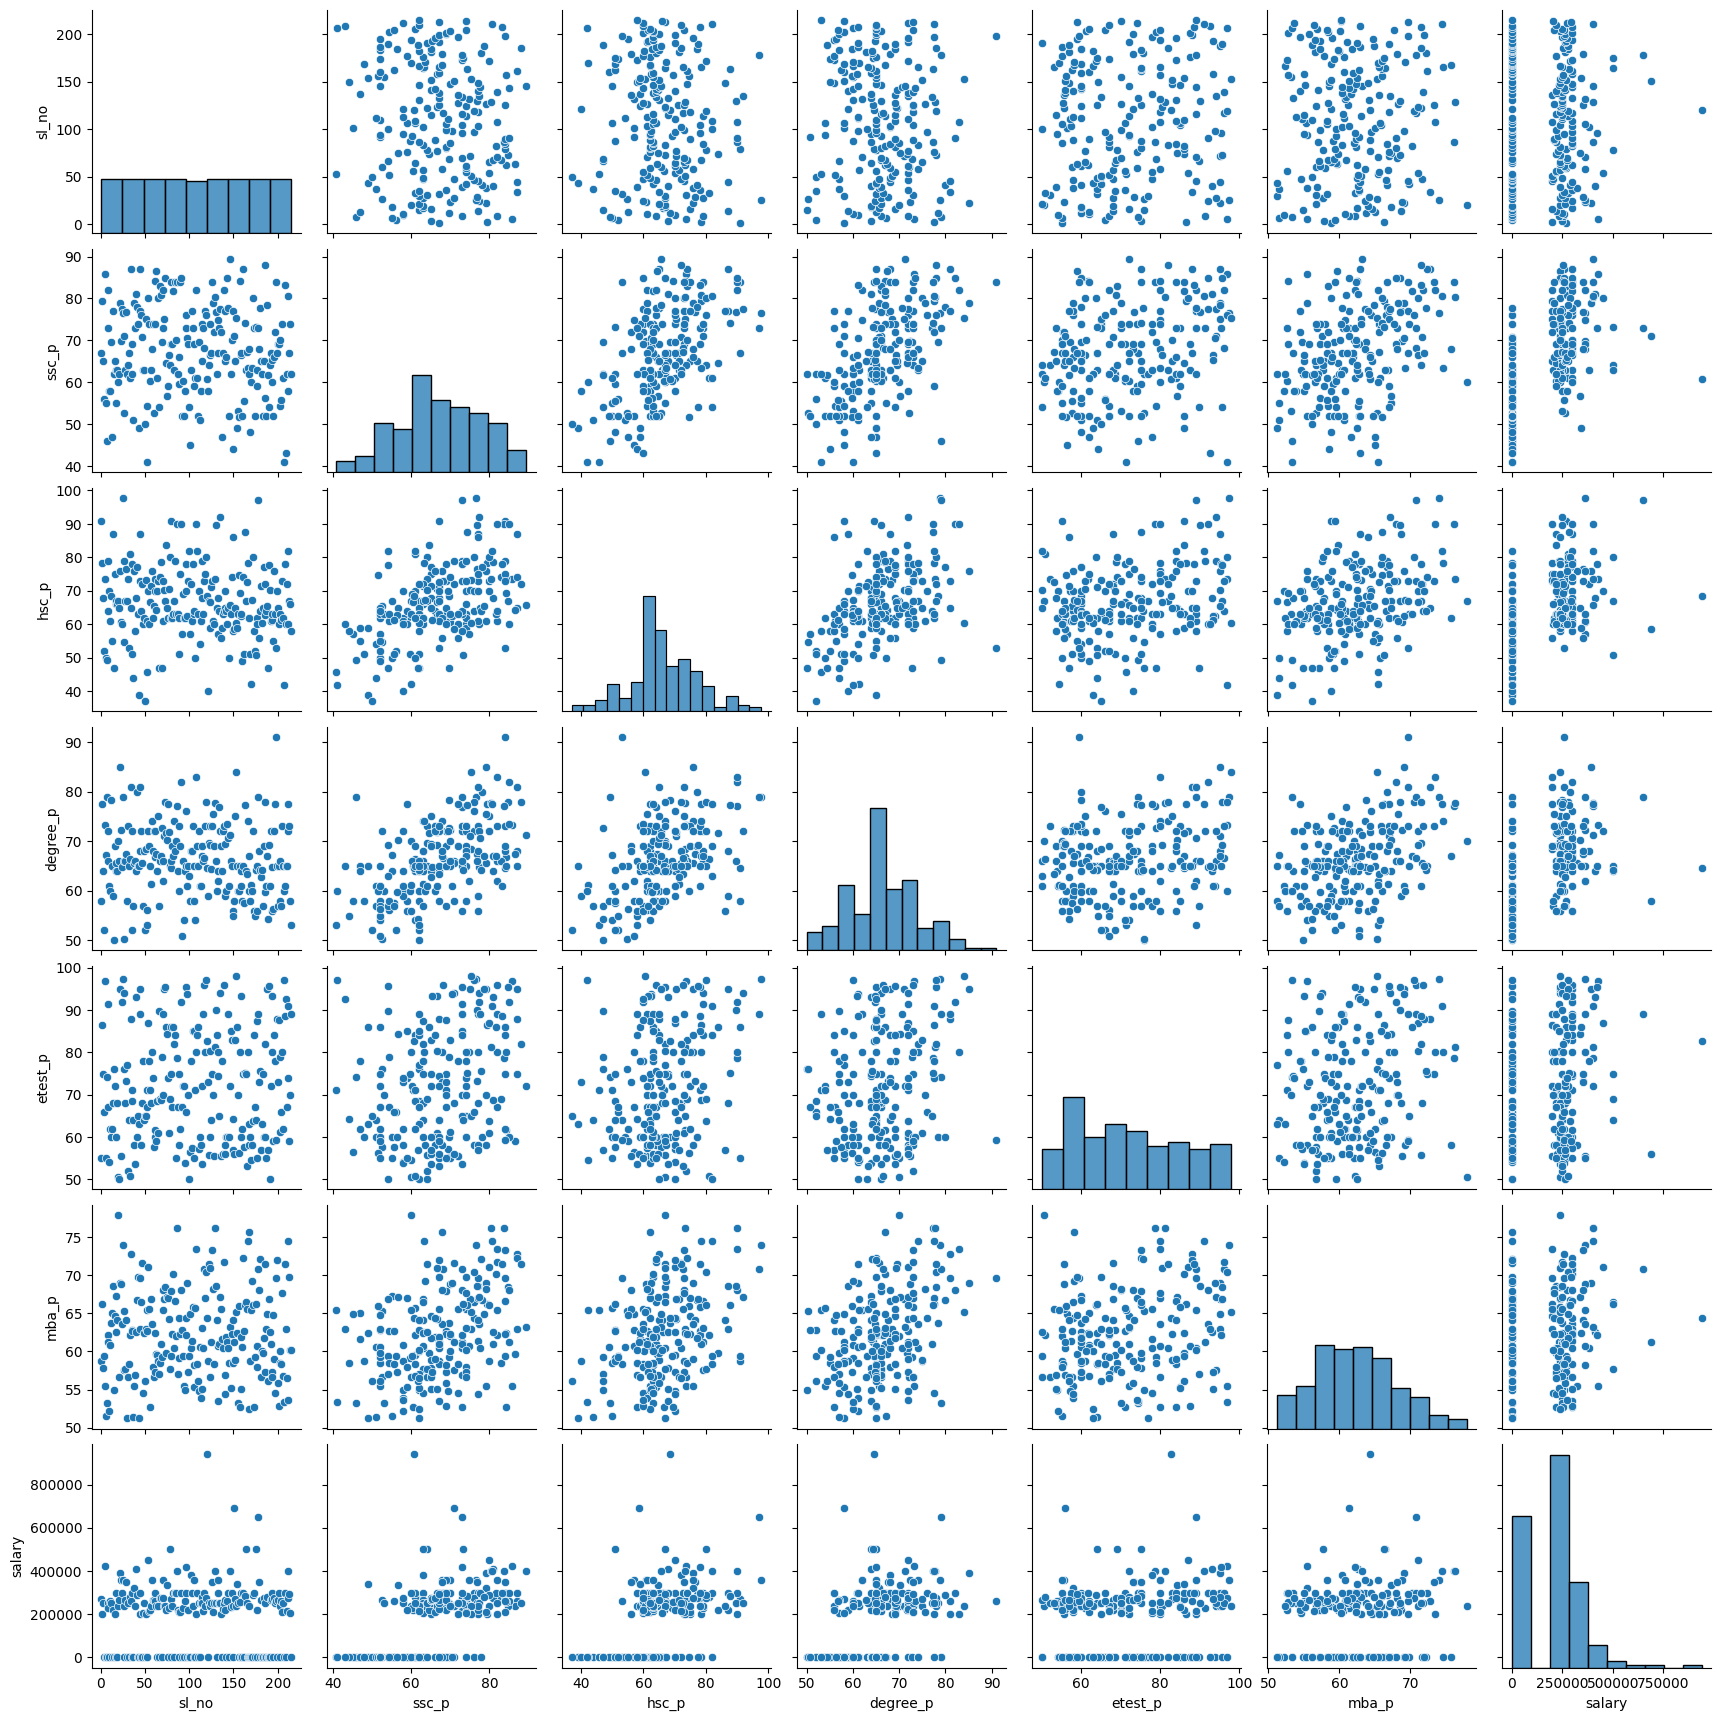

In [8]:
sns.pairplot(dataset)
#pairplot=is for seeing graphical representation of the above table values,also in bivariate pairplot is must

In [9]:
##VARIANCE INFLATION FACTOR[VIF] CALCULATION:-
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    
    # Initialize an empty list to store the VIF values
    vif_values = []

    # Loop through each feature index and calculate the VIF
    for i in range(X.shape[1]):
        vif_value = variance_inflation_factor(X.values, i)
        vif_values.append(vif_value)

    # Assign the VIF values to the DataFrame
    vif["VIF"] = vif_values
    
    return vif


In [10]:

quan=[]
qual=[]
for columnName in dataset.columns:
    #print(columnName)
    if(dataset[columnName].dtype=='O'):
        #print("qual")
        qual.append(columnName)
    else:
        #print("quan")
        quan.append(columnName)

In [11]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [12]:
calc_vif(dataset[quan])
#By calculating all quan values we get salary column alone -moderatly correlated,other all hoghly correletated,
#so we need to minimise high values by neglecting it.

,variables,VIF
0,sl_no,4.046145
1,ssc_p,76.789794
2,hsc_p,59.219135
3,degree_p,113.326503
4,etest_p,33.191651
5,mba_p,118.651958
6,salary,3.939976


In [13]:
calc_vif(dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'salary']])

,variables,VIF
0,ssc_p,71.644437
1,hsc_p,54.750663
2,degree_p,81.419329
3,etest_p,30.843155
4,salary,3.422882


In [14]:
calc_vif(dataset[['etest_p', 'salary']])
#Eliminating all the highest vif values for getting not corr /moderately corr values

,variables,VIF
0,etest_p,2.745261
1,salary,2.745261


In [15]:
##T-TEST CONCEPT:
##Independant Sample- Unpaired T Test=Diferrent Group(Male, Female) but same contion(salary)


In [16]:
dataset[dataset['gender']=='F']["salary"]

6           0.0
12          0.0
13     218000.0
15     200000.0
17          0.0
         ...   
197    260000.0
198         0.0
204    210000.0
208         0.0
213    204000.0
Name: salary, Length: 76, dtype: float64

In [17]:
#Coding done based on this criteria-Diferrent Group(Male, Female) but same contion(salary)
from scipy.stats import ttest_ind
dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['salary']
female = dataset[dataset['gender']=='F']['salary']
#print(male)
ttest_ind(male, female)

TtestResult(statistic=np.float64(2.1103433958668765), pvalue=np.float64(0.03599560646745178), df=np.float64(213.0))

In [18]:
##Dependant Sample-Paired T_Test=Same Group(Male) but Different Condition(ssc_p,hsc_p)

In [19]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)

TtestResult(statistic=np.float64(0.6852881050898076), pvalue=np.float64(0.49431164600731514), df=np.int64(138))

In [20]:
#Example 2-
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
commerce = dataset[dataset['hsc_s']=='Commerce']['ssc_p']
commerce1 = dataset[dataset['hsc_s']=='Commerce']['hsc_p']
ttest_rel(commerce, commerce1)

TtestResult(statistic=np.float64(-3.105761668204218), pvalue=np.float64(0.0024045067541643254), df=np.int64(112))

In [21]:
# Hypothesis Testing

In [22]:
#Statement: Test whether SSC_p of male and HSC_P of Male is Same?
#Null hypothesis=There is no similarity between 10th pass mark of male  and 12th pass mark of male

In [23]:
from scipy.stats import ttest_rel
#dataset=dataset.dropna()
male = dataset[dataset['gender']=='M']['ssc_p']
male1 = dataset[dataset['gender']=='M']['hsc_p']
ttest_rel(male, male1)

TtestResult(statistic=np.float64(0.6852881050898076), pvalue=np.float64(0.49431164600731514), df=np.int64(138))

In [24]:
#The above output explanation for Hypothesis testing:-
#Reject Null hypothesis p<0.05
#Accept Null Hypothesi and Reject Alternate hypothsis

In [25]:
##ANAVO : Analysis of Variance

In [26]:
import scipy.stats as stats

stats.f_oneway(dataset['ssc_p'],dataset['hsc_p'],dataset['degree_p'])

F_onewayResult(statistic=np.float64(0.6719700864663097), pvalue=np.float64(0.5110602818995302))

In [27]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
degree=dataset[dataset["degree_t"]=="Sci&Tech"]["salary"]
specialisation=dataset[dataset["specialisation"]=="Mkt&HR"]["salary"]
ttest_ind(degree,specialisation)

TtestResult(statistic=np.float64(2.692041243555374), pvalue=np.float64(0.007897969943471179), df=np.float64(152.0))